In [1]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
from tensorflow.keras.preprocessing import image

In [2]:
train_data_dir = 'C:/Users/mistr/jupyter notebook codes/project dl/dataset/train'
test_data_dir = 'C:/Users/mistr/jupyter notebook codes/project dl/dataset/test'
val_data_dir = 'C:/Users/mistr/jupyter notebook codes/project dl/dataset/validation'

In [3]:
img_width, img_height = 150, 150
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  

validation_generator = test_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
epochs = 5
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=epochs, 
          validation_data=validation_generator, validation_steps=len(validation_generator))


Epoch 1/5
563/563 [==============================] - 346s 615ms/step - loss: 0.2033 - accuracy: 0.9179 - val_loss: 0.1706 - val_accuracy: 0.9295
Epoch 2/5
563/563 [==============================] - 358s 636ms/step - loss: 0.1051 - accuracy: 0.9595 - val_loss: 0.1731 - val_accuracy: 0.9405
Epoch 3/5
563/563 [==============================] - 320s 569ms/step - loss: 0.0780 - accuracy: 0.9707 - val_loss: 0.0704 - val_accuracy: 0.9770
Epoch 4/5
563/563 [==============================] - 390s 693ms/step - loss: 0.0396 - accuracy: 0.9847 - val_loss: 0.0471 - val_accuracy: 0.9790
Epoch 5/5
563/563 [==============================] - 420s 745ms/step - loss: 0.0300 - accuracy: 0.9894 - val_loss: 0.0567 - val_accuracy: 0.9780


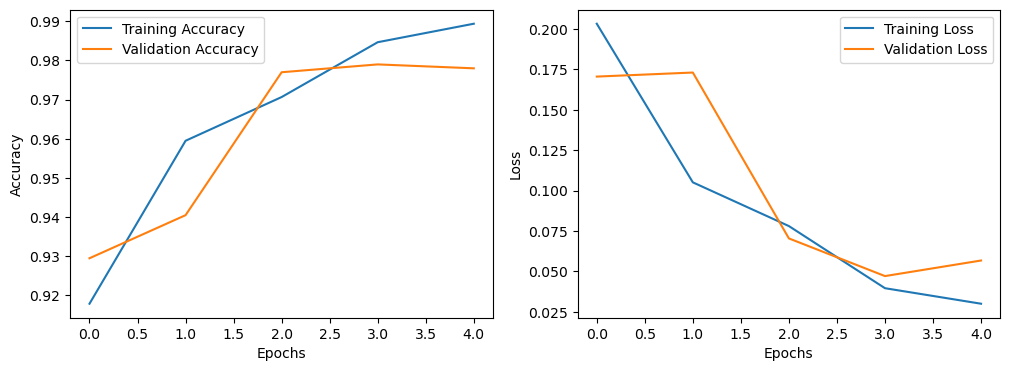

In [11]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [13]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 9s 144ms/step - loss: 0.0481 - accuracy: 0.9805
Test accuracy: 98.05%


In [17]:
import os


test_images_dir = 'C:/Users/mistr/jupyter notebook codes/project dl/dataset/testing image'


image_files = [f for f in os.listdir(test_images_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(len(image_files))

threshold = 0.3
image_size = (150, 150)  

for image_file in image_files:
    
    image_path = os.path.join(test_images_dir, image_file)

   
    test_image = image.load_img(image_path, target_size=image_size)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    
    result = model.predict(test_image)
    print(f"{image_file}: Prediction = {result[0][0]}")
    if result[0][0] < threshold:
        print(f"{image_file} is healthy.")
    else:
        print(f"{image_file} is infected.")


22
1/1 [==============================] - 1s 587ms/step
AppleCedarRust1.JPG: Prediction = 0.0
AppleCedarRust1.JPG is healthy.
1/1 [==============================] - 0s 24ms/step
AppleCedarRust2.JPG: Prediction = 0.0
AppleCedarRust2.JPG is healthy.
1/1 [==============================] - 0s 101ms/step
AppleCedarRust3.JPG: Prediction = 0.0
AppleCedarRust3.JPG is healthy.
1/1 [==============================] - 0s 48ms/step
AppleCedarRust4.JPG: Prediction = 1.0
AppleCedarRust4.JPG is infected.
1/1 [==============================] - 0s 24ms/step
AppleScab1.JPG: Prediction = 0.0
AppleScab1.JPG is healthy.
1/1 [==============================] - 0s 45ms/step
AppleScab2.JPG: Prediction = 0.0
AppleScab2.JPG is healthy.
1/1 [==============================] - 0s 35ms/step
AppleScab3.JPG: Prediction = 0.0
AppleScab3.JPG is healthy.
1/1 [==============================] - 0s 28ms/step
CornCommonRust1.JPG: Prediction = 1.0
CornCommonRust1.JPG is infected.
1/1 [==============================] - 0s 29ms/

63/63 [==============================] - 8s 125ms/step
Confusion Matrix:
[[478 522]
 [487 513]]


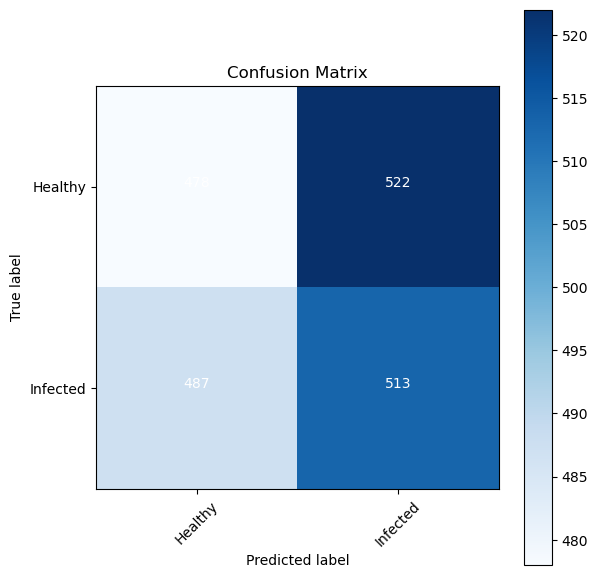

In [15]:
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int) 
y_true = test_generator.classes

confusion_mtx = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)


plt.figure(figsize=(6, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Healthy', 'Infected'], rotation=45)
plt.yticks(tick_marks, ['Healthy', 'Infected'])

thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
classification_rep = classification_report(y_true, y_pred, target_names=['Healthy', 'Infected'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.50      0.48      0.49      1000
    Infected       0.50      0.51      0.50      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

